In [ ]:
import pandas as pd

df_2016 = pd.read_feather("../data/df_2016_cleaned_with_place.feather")

In [3]:
df_2016.columns

Index(['id', 'DateTime', 'tweet_content', 'cashtags', 'coordinates',
       'hashtags', 'lang', 'like_count', 'media', 'mentioned_users', 'place',
       'quoteCount', 'quotedTweet', 'renderedContent', 'replyCount',
       'retweetCount', 'retweetedTweet', 'source', 'username', 'user_location',
       'user_id', 'user_displayname', 'user_description',
       'user_description_urls', 'user_verified', 'user_created',
       'user_followers_count', 'user_friends_count', 'user_statuses_count',
       'user_favourites_count', 'user_listed_count', 'user_media_count',
       'user_protected', 'user_link_url', 'user_link_tcourl',
       'user_profile_image_url', 'user_profile_banner_url', 'user_label',
       'resident/visitor', 'tweet', 'place_full_name', 'place_name',
       'place_type', 'place_country', 'place_country_code'],
      dtype='object')

In [4]:
df_2016[df_2016.coordinates != "None"]["resident/visitor"].value_counts()

visitor     2047198
resident      25903
Name: resident/visitor, dtype: int64

In [5]:
df_2016.coordinates.value_counts(dropna=False)

None                                                           5613442
Coordinates(longitude=-84.5919495, latitude=9.0655537)          240329
Coordinates(longitude=-84.0791779, latitude=9.4674778)          187638
Coordinates(longitude=-85.4422302, latitude=9.8233318)          137404
Coordinates(longitude=-85.3044586, latitude=8.0379929)          113304
                                                                ...   
Coordinates(longitude=86.68536886, latitude=57.4530045)              1
Coordinates(longitude=55.89880423, latitude=-86.22465516)            1
Coordinates(longitude=-103.94580561, latitude=-0.87902011)           1
Coordinates(longitude=-123.05606869, latitude=-80.28401614)          1
Coordinates(longitude=-68.8237708, latitude=-32.8969052)             1
Name: coordinates, Length: 289296, dtype: int64

In [6]:
df_2016.place_country.value_counts(dropna=False)

None                                   5689456
Costa Rica                             1599239
United States                           109470
Nicaragua                                47431
Argentina                                27279
                                        ...   
French Southern and Antarctic Lands          1
Comoros                                      1
Guam                                         1
Mayotte                                      1
Gambia                                       1
Name: place_country, Length: 221, dtype: int64

In [9]:
df = df_2016[df_2016.coordinates != "None"].reset_index(drop=True)

In [10]:
df.coordinates[0]

'Coordinates(longitude=-85.3044586, latitude=8.0379929)'

In [ ]:
import tqdm
import re

def extract_coordinates(df):
    
    df_coord = df
    
    df_coord['coordinates_longitude'] = "None"
    df_coord['coordinates_latitude'] = "None"

    for i in tqdm.tqdm(range(df_coord.shape[0])):

        if df_coord.coordinates[i] != "None":
            try:
                split_by = "Coordinates\(longitude=|, latitude=|\)"
                temp = re.split(split_by, df_coord.coordinates[i])

                df_coord['coordinates_longitude'][i] = temp[1]
                df_coord['coordinates_latitude'][i] = temp[2]

            except:
                df_coord['coordinates_longitude'][i] = None
                df_coord['coordinates_latitude'][i] = None
                
            

    return df_coord

df = extract_coordinates(df)

  0%|          | 0/2073101 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 20%|█▉        | 413059/2073101 [1:51:17<8:38:43, 53.34it/s]

In [ ]:
df.to_feather("../data/df_2016_location_eda.feather")

In [ ]:
df.place_country.value_counts(dropna=False)

In [ ]:
df.DateTime = pd.to_datetime(df.DateTime).dt.date

df_tweet_locations = df[["date", "place_country"]].value_counts()
df_tweet_locations

In [ ]:
# convert datetime to dates

df_tweet_loca

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df_tweet_locations,
                     #locations = "location_name",
                     lat="coordinates_latitude", lon="coordinates_longitude", 
                     size="number_tweets",
                     color = "place_country",
                     animation_frame=df_dengue["date"],
                     projection="natural earth",
                     height = 800)
fig.show()

In [62]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

role = get_execution_role()

df_dengue = pd.read_feather("s3://mt5599/dengue_cases/dataset.feather")
df_dengue

level_0  index       id  \
0           0      0  8163513   
1           1      1  8163513   
2           2      2  8163513   
3           3      3  8163513   
4           4      4  8163513   
5           5      5  8163513   
6           6      6  8163513   
7           7      7  8163513   
8           8      8  8163513   
9           9      9  8163513   
10         10     10  8163513   
11         11     11  8163513   
12         12     12  8163513   
13         13     13  8163513   
14         14     14  8163513   
15         15     15  8163513   
16         16     16  8163513   
17         17     17  8163513   
18         18     18  8163513   
19         19     19  8163513   
20         20     20  8163513   
21         21     21  8163513   
22         22     22  8163513   
23         23     23  8163513   
24         24     24  8163513   
25         25     25  8163513   
26         26     26  8163513   
27         27     27  8163513   
28         28     28  8163513   
29         29     29  8163513   
30         30     30  8163513   
31         31     31  8163513   
32         32     32  8163513   
33         33     33  8163513   
34         34     34  8163513   
35         35     35  8163513   
36         36     36  8163513   
37         37     37  8163513   
38         38     38  8163513   
39         39     39  8163513   
40         40     40  8163513   
41         41     41  8163513   
42         42     42  8380922   
43         43     43  8380922   
44         44     44  8380922   
45         45     45  8380922   
46         46     46  8380922   
47         47     47  8380922   
48         48     48  8380922   
49         49     49  8380922   
50         50     50  8380922   
51         51     51  8380922   
52         52     52  8380922   
53         53     53  8380922   
54         54     54  8380922   
55         55     55  8380922   
56         56     56  8380922   
57         57     57  8380922   
58         58     58  8380922   
59         59     59  8380922   
60         60     60  8380922   
61         61     61  8380922   
62         62     62  8380922   
63         63     63  8380922   
64         64     64  8380922   
65         65     65  8380922   
66         66     66  8380922   
67         67     67  8380922   
68         68     68  8380922   
69         69     69  8380922   
70         70     70  8380922   
71         71     71  8380922   
72         72     72  8380922   
73         73     73  8380922   
74         74     74  8322075   
75         75     75  8322075   
76         76     76  8322075   
77         77     77  8322075   
78         78     78  8322075   
79         79     79  8322075   
80         80     80  8322075   
81         81     81  8322075   
82         82     82  8322075   
83         83     83  8322075   
84         84     84  8322075   
85         85     85  8322075   
86         86     86  8322075   
87         87     87  8322075   
88         88     88  8322075   
89         89     89  8322075   
90         90     90  8322075   
91         91     91  8322075   
92         92     92  8322075   
93         93     93  8322075   
94         94     94  8322075   
95         95     95  8322075   
96         96     96  8322075   
97         97     97  8322075   
98         98     98  8322075   
99         99     99  8322075   
100       100    100  8322075   
101       101    101  8322075   
102       102    102  8322075   
103       103    103  8322075   
104       104    104  8322075   
105       105    105  7737065   
106       106    106  7737065   
107       107    107  7737065   
108       108    108  7737065   
109       109    109  7737065   
110       110    110  7737065   
111       111    111  7737065   
112       112    112  7737065   
113       113    113  7737065   
114       114    114  7737065   
115       115    115  7737065   
116       116    116  7737065   
117       117    117  7737065   
118       118    118  7737065   
119       119    119  7737065   
120       120

In [65]:
df_dengue["issue_date"] = [d.strftime("%Y-%m-%d") for d in df_dengue["issue_date"]]
df_dengue[df_dengue.issue_date.str.startswith("2020-05-27")]

Empty DataFrame
Columns: [level_0, index, id, title, zoom_lat, zoom_lon, zoom_level, alert_id, feed_id, summary, issue_date, load_date, incident_date, descr, alert_tag_id, dup_count, dup_of, unique_string, info_hash, submitted_by, reviewed, search_string_id, content, disease, gpm_lat_idx, gpm_lon_idx, precipitation_anomaly, location_name, dates_start, serotype, total_cases, cases, severe_cases, deaths, admin1_code, admin2_code, admin3_code, admin4_code, cases_tags, deaths_tags, dates_end, precipitation_value, precipitation_mean, issue_month]
Index: []

[0 rows x 44 columns]

In [71]:
pd.set_option('display.max_rows', None)
df_dengue.issue_date.value_counts()

2021-02-04    43
2020-08-11    42
2020-01-14    40
2019-01-03    40
2020-11-15    39
2020-09-01    38
2020-03-30    37
2020-04-29    36
2020-03-07    36
2021-05-25    32
2021-04-22    31
2019-04-25    30
2019-03-19    29
2019-03-29    29
2019-06-04    29
2019-08-22    28
2015-09-28    28
2016-08-02    26
2016-07-12    23
2018-02-08    19
2017-09-21    19
2016-02-25    17
2016-08-22    17
2015-12-22    17
2016-02-17    15
2019-02-07    13
2016-04-26    12
2016-03-03    10
2016-03-26    10
2016-12-09     9
2010-08-08     4
2015-11-18     3
2012-09-20     3
2017-09-18     3
2017-09-19     3
2014-02-02     3
2013-07-12     3
2012-05-19     3
2010-12-21     2
2010-11-06     2
2010-10-22     2
2010-10-12     2
2011-03-09     2
2010-05-18     2
2010-05-01     2
2010-02-16     2
2006-01-24     2
2010-01-06     2
2009-12-10     2
2009-07-30     2
2008-12-22     2
2008-12-01     2
2008-04-17     2
2007-08-15     2
2007-07-17     2
2007-01-12     2
2006-11-17     2
2006-06-20     2
2011-04-19    

In [70]:
df_dengue.columns

Index(['level_0', 'index', 'id', 'title', 'zoom_lat', 'zoom_lon', 'zoom_level',
       'alert_id', 'feed_id', 'summary', 'issue_date', 'load_date',
       'incident_date', 'descr', 'alert_tag_id', 'dup_count', 'dup_of',
       'unique_string', 'info_hash', 'submitted_by', 'reviewed',
       'search_string_id', 'content', 'disease', 'gpm_lat_idx', 'gpm_lon_idx',
       'precipitation_anomaly', 'location_name', 'dates_start', 'serotype',
       'total_cases', 'cases', 'severe_cases', 'deaths', 'admin1_code',
       'admin2_code', 'admin3_code', 'admin4_code', 'cases_tags',
       'deaths_tags', 'dates_end', 'precipitation_value', 'precipitation_mean',
       'issue_month'],
      dtype='object')

In [3]:
df_dengue = df_dengue[df_dengue.disease == "dengue"]
df_dengue[["location_name", "zoom_lat", "zoom_lon", "dates_start", "serotype", "total_cases", "cases", "severe_cases", "deaths"]]

location_name   zoom_lat    zoom_lon dates_start   serotype  total_cases  \
0             USA  39.783730 -100.445882  2021-01-02          -        307.0   
1          Belize  16.825979  -88.760093  2021-01-02       D1,3       2779.0   
2      Costa Rica  10.273563  -84.073910  2021-01-02       D1,2      10056.0   
3     El Salvador  13.800038  -88.914068  2020-12-26         D2       5450.0   
4       Guatemala  15.635609  -89.898809  2020-11-14   D1,2,3,4       5782.0   
..            ...        ...         ...         ...        ...          ...   
783       Ecuador  -1.339767  -79.366697  2015-09-04     40 665        414.0   
784          Peru  -6.869970  -75.045851  2015-09-11     36 097      17650.0   
785     Argentina -34.996496  -64.967282  2015-09-11       3034        258.0   
786        Brazil -10.333333  -53.200000  2015-08-14  1 390 779     409221.0   
787      Paraguay -23.316593  -58.169345  2015-09-04     38 977       4456.0   

     cases  severe_cases  deaths  
0    307.0           0.0     0.0  
1    324.0           0.0     0.0  
2    426.0          21.0     0.0  
3      0.0           9.0     0.0  
4    786.0          14.0     8.0  
..     ...           ...     ...  
783    0.0          51.0     6.0  
784    0.0         115.0    49.0  
785    0.0           0.0     0.0  
786    0.0        1239.0   660.0  
787    0.0           6.0     3.0  

[788 rows x 9 columns]

In [ ]:
df_dengue.sort_values(by="dates_start", inplace=True)

In [ ]:
df_dengue.dates_start

In [ ]:
pd.set_option('display.max_rows', None)
df_dengue.serotype

In [ ]:
df_dengue[569:]

In [ ]:
df_2016.coordinates

In [ ]:
print(df_2016.DateTime.max(), df_2016.DateTime.min())

In [ ]:
df_2016.lang.value_counts(dropna=False)

In [ ]:
df_2016["resident/visitor"].value_counts(dropna=False)

In [ ]:
df_2016.columns

In [ ]:
df_2016.place.value_counts(dropna=False)

In [ ]:

df = px.data.gapminder()
df

In [56]:
df_dengue = df_dengue[df_dengue.dates_start.notna()].reset_index(drop=True)
df_dengue["dates_start"] = [d.strftime("%Y-%m-%d") for d in df_dengue["dates_start"]]
df_dengue["dates_start"]

0      2021-01-02
1      2021-01-02
2      2021-01-02
3      2020-12-26
4      2020-11-14
5      2021-01-02
6      2021-01-02
7      2021-01-02
8      2021-01-02
9      2020-06-27
10     2021-01-02
11     2021-01-02
12     2020-10-08
13     2020-11-28
14     2020-06-13
15     2020-11-28
16     2021-01-02
17     2020-12-12
18     2021-01-02
19     2021-01-02
20     2020-06-13
21     2020-11-07
22     2020-12-12
23     2021-01-02
24     2021-01-02
25     2021-01-02
26     2021-01-02
27     2021-01-02
28     2021-01-02
29     2021-01-02
30     2021-01-02
31     2021-01-02
32     2020-10-31
33     2020-10-31
34     2021-01-02
35     2021-01-02
36     2021-01-02
37     2021-01-02
38     2021-01-02
39     2020-11-28
40     2020-11-14
41     2021-01-02
42     2021-05-08
43     2021-05-01
44     2020-05-01
45     2021-02-13
46     2021-04-24
47     2021-05-01
48     2021-05-08
49     2021-05-08
50     2021-05-15
51     2021-02-27
52     2021-03-27
53     2021-04-24
54     2021-04-24
55     202

In [ ]:
df_dengue_smaller = df_dengue[df_dengue.cases <= 100000]


In [ ]:
df_dengue[df_dengue.cases > 100000].shape

In [ ]:
df_dengue_smaller_argentina = df_dengue_smaller[df_dengue_smaller.location_name == "Argentina"]
df_dengue_smaller_argentina.cases.describe()

In [ ]:
df_dengue_smaller.cases.value_counts()

In [ ]:
df_dengue_

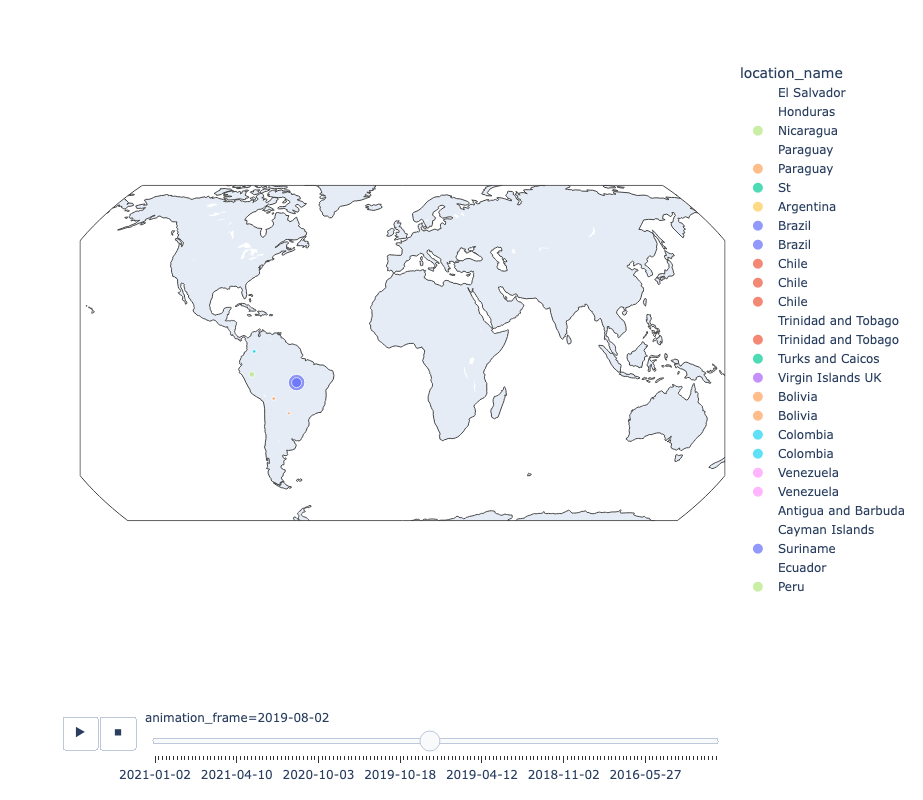

In [57]:
import plotly.express as px

fig = px.scatter_geo(df_dengue[df_dengue.dates_start.notna()].reset_index(drop=True),
                     #locations = "location_name",
                     lat="zoom_lat", lon="zoom_lon", 
                     size="cases",
                     color = "location_name",
                     animation_frame=df_dengue["dates_start"],
                     projection="natural earth",
                     height = 800)
fig.show()

In [ ]:
df_dengue[df_dengue.issue_date]

In [61]:
df_dengue[df_dengue.issue_date == "2020-05-27 12:37:33"]

Empty DataFrame
Columns: [level_0, index, id, title, zoom_lat, zoom_lon, zoom_level, alert_id, feed_id, summary, issue_date, load_date, incident_date, descr, alert_tag_id, dup_count, dup_of, unique_string, info_hash, submitted_by, reviewed, search_string_id, content, disease, gpm_lat_idx, gpm_lon_idx, precipitation_anomaly, location_name, dates_start, serotype, total_cases, cases, severe_cases, deaths, admin1_code, admin2_code, admin3_code, admin4_code, cases_tags, deaths_tags, dates_end, precipitation_value, precipitation_mean, issue_month]
Index: []

[0 rows x 44 columns]

In [51]:
import plotly.express as px

url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")

fig = px.choropleth(df_dengue,
                    locations="location_name",#"iso_alpha",
                    locationmode="country names",#"ISO-3",
                    hover_name = "location_name",
                    geojson = f"{url}/world-countries.json",
                    color="cases",
                    animation_frame="dates_start",
                    projection="natural earth",
                    hover_data = df_dengue[["serotype", "cases"]],
                    range_color = (0,10000),
                    height = 1000)

fig.show()

KeyError: Timestamp('2021-01-02 00:00:00')

In [52]:
df_dengue.dates_start

0     2021-01-02
1     2021-01-02
2     2021-01-02
3     2020-12-26
4     2020-11-14
5     2021-01-02
6     2021-01-02
7     2021-01-02
8     2021-01-02
9     2020-06-27
10    2021-01-02
11    2021-01-02
12    2020-10-08
13    2020-11-28
14    2020-06-13
15    2020-11-28
16    2021-01-02
17    2020-12-12
18    2021-01-02
19    2021-01-02
20    2020-06-13
21    2020-11-07
22    2020-12-12
23    2021-01-02
24    2021-01-02
25    2021-01-02
26    2021-01-02
27    2021-01-02
28    2021-01-02
29    2021-01-02
30    2021-01-02
31    2021-01-02
32    2020-10-31
33    2020-10-31
34    2021-01-02
35    2021-01-02
36    2021-01-02
37    2021-01-02
38    2021-01-02
39    2020-11-28
40    2020-11-14
41    2021-01-02
42    2021-05-08
43    2021-05-01
44    2020-05-01
45    2021-02-13
46    2021-04-24
47    2021-05-01
48    2021-05-08
49    2021-05-08
50    2021-05-15
51    2021-02-27
52    2021-03-27
53    2021-04-24
54    2021-04-24
55    2021-02-20
56    2021-01-30
57    2021-01-23
58    2021-04-

In [47]:
pd.set_option('display.max_rows', None)
df_dengue.location_name.value_counts()

Peru                             27
El Salvador                      27
Argentina                        26
Nicaragua                        25
Colombia                         25
Ecuador                          25
Guatemala                        24
Honduras                         24
Mexico                           23
Costa Rica                       22
Brazil                           21
Dominican Republic               21
Jamaica                          21
Paraguay                         20
Venezuela                        19
Martinique                       18
USA                              18
Panama                           18
Bolivia                          18
Belize                           17
Dominica                         16
Guadeloupe                       16
Grenada                          15
Aruba                            15
Puerto Rico                      15
Trinidad and Tobago              14
French Guiana                    13
Virgin Islands UK           

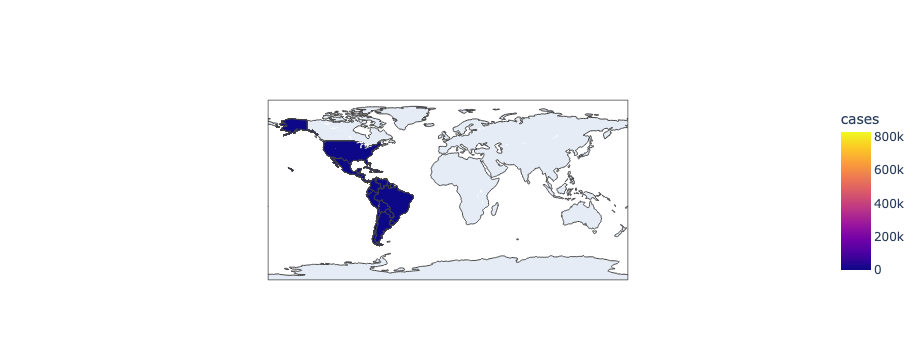

In [8]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_dengue['location_name'], 
    z = df_dengue['cases'],
    #z = df_dengue['lifeExp'].astype(float), 
    locationmode = 'country names', 
    colorscale = 'plasma',
    colorbar_title = "cases",
    hovertext='country',
    
))

#fig.update_layout(title_text = 'Population in Asia', geo_scope='asia')
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



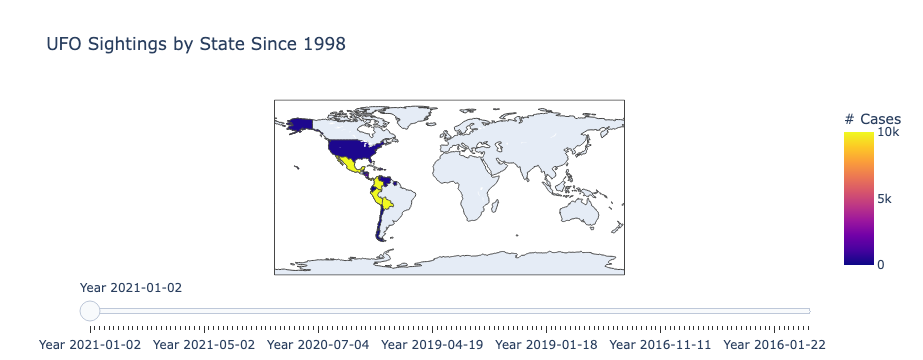

In [45]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
# import plotly.plotly as py

# min year in your dataset
# year = 2014

# your color-scale
scl = [[0.0, '#ffffff'], [0.2, '#b4a8ce'], [0.4, '#8573a9'], [0.6, '#7159a3'], [0.8, '#5732a1'], [1.0, '#2c0579']] # purples

df = df_dengue

data_slider = []
for year in df['dates_start'].unique():
    df_segmented =  df[(df['dates_start']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented['location_name'],
                        z=df_segmented['cases'],
                        zmin=0,
                        zmax=10000,
                        locationmode='country names',
                        #colorscale = 'plasma',
                        colorbar= {'title':'# Cases'},
                        customdata=df_segmented['dates_start'].reset_index()["dates_start"]
    )

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(data_slider[i]["customdata"][0]))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='UFO Sightings by State Since 1998', sliders=sliders)

fig = dict(data=data_slider, layout=layout)

go.Figure(fig)

In [42]:
data_slider[0]["customdata"][0]

0     2021-01-02
1     2021-01-02
2     2021-01-02
3     2021-01-02
4     2021-01-02
5     2021-01-02
6     2021-01-02
7     2021-01-02
8     2021-01-02
9     2021-01-02
10    2021-01-02
11    2021-01-02
12    2021-01-02
13    2021-01-02
14    2021-01-02
15    2021-01-02
16    2021-01-02
17    2021-01-02
18    2021-01-02
19    2021-01-02
20    2021-01-02
21    2021-01-02
22    2021-01-02
23    2021-01-02
24    2021-01-02
25    2021-01-02
26    2021-01-02
Name: dates_start, dtype: object

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

flight_paths = []
for i in range(len(df_flight_paths)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
            lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

fig.update_layout(
    title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

https://plotly.com/python/bubble-maps/
https://plotly.com/python/mixed-subplots/
https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [9]:
from transformers import BartForConditionalGeneration, BartTokenizer
from tqdm import tqdm
import pandas as pd
from geopy.extra.rate_limiter import RateLimiter
from geopy import Nominatim
from datetime import datetime

#from epitator.geoname_annotator import GeonameAnnotator
#from epitator.date_annotator import DateAnnotator
#from epitator.count_annotator import CountAnnotator
#from epitator.annotator import AnnoDoc

import re
import sys
import spacy
import os
os.environ['SPACY_MODEL_SHORTCUT_LINK'] = 'en_core_web_trf'

spacy.require_gpu()

sys.path.append('../EpiTator')


locator = Nominatim(user_agent="ppcoom")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1/20)
dengue_regex = re.compile(
    r'([A-Za-z ]+).*\[w\/e (.+)\] \/ (.+) \/ (.+) \/ (.+) \/ (.+) \/ (.+)', re.MULTILINE)

tqdm.pandas()

# setup our BART transformer summarization model
print('loading transformers')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained(
    'facebook/bart-large-cnn').cuda()


def clean(content):
    split = content.splitlines()
    last_index = -1
    lower = [x.lower().strip() for x in split]
    if '--' in lower:
        last_index = lower.index('--')
    elif 'communicated by:' in lower:
        last_index = lower.index('communicated by:')-1

    cleaned = split[12:last_index]
    return '\n'.join([x for x in cleaned if x])

# helper function to summarize an input text with the BART model


def summarizer(text: str) -> str:
    input_ids = tokenizer(text, return_tensors='pt', max_length=1024,
                          padding=True, truncation=True)['input_ids']
    summary_ids = model.generate(input_ids.cuda())
    summary = ''.join([tokenizer.decode(s) for s in summary_ids])
    summary = summary.replace('<s>', '').replace('</s>', '')
    return summary

# function that extracts location names/admin codes/lat/lng, case and death counts, and date ranges from the input string
# uses epitator since it already trained rules for extracting medical/infectious disease data

def parse_dengue(row):
    return pd.DataFrame([(
        *row[2:],
        match[0].strip(),
        pd.NA if re.match(r'\d+ \w{3} \w{4}', re.sub(r'[^\w ]+', '', match[1])) is None
        else datetime.strptime(re.sub(r'[^\w ]+', '', match[1]), r'%d %b %Y'),
        match[2],
        *[pd.NA if not match[i].replace(' ', '').isnumeric() else int(match[i].replace(' ', '')) for i in range(3, 7)])
        for match in dengue_regex.findall(row['content'])],
        columns=[
        *row[2:].keys(),
        'location_name',
        'dates_start',
        'serotype',
        'total_cases',
        'confirmed_cases',
        'severe_cases',
        'deaths'
    ])



print('Opening df')
df = pd.read_feather('../data/combined_df.feather')

print('Cleaning')
df['content'] = df['content'].progress_apply(clean)
df = df[df['content'].str.contains(
    '|'.join(('case', 'cases', 'death', 'deaths')))]

dengue_df = df[df['disease'] == 'dengue']

print('Parsing dengue')
dengue_df = pd.concat([parse_dengue(row)
                      for _, row in tqdm(dengue_df.iterrows())])
dengue_df['location'] = dengue_df['location_name'].progress_apply(geocode)
dengue_df['point'] = dengue_df['location'].progress_apply(
    lambda loc: tuple(loc.point) if loc else None)
dengue_df[['location_lat', 'location_lon', 'altitude']] = pd.DataFrame(
    dengue_df['point'].tolist(), index=dengue_df.index)
dengue_df = dengue_df.drop(['location', 'point', 'altitude'], axis=1)
dengue_df = dengue_df.rename({'confirmed_cases', 'cases'})
dengue_df = dengue_df.reset_index(drop=True)

print('Finishing up')
full_df = dengue_df#pd.concat([df, dengue_df], axis=0, ignore_index=True)
full_df.to_feather('dataset.feather')
full_df = full_df.drop(['Unnamed: 0', 'index'], axis=1)
full_df.to_feather('dataset.feather')

ValueError: No GPU devices detected

In [10]:
spacy.require_gpu()

ValueError: No GPU devices detected

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-01e17811-2a7b-6939-6d5a-e69efc548bf3)
